This is a script to explore the use of the 'quiet day curves' from GIC data prepared by [Kellerman et al., 2021](https://zenodo.org/record/4444068)

TODO
- First try to generate event statistics (burst analyses) and compare with NERC data
- Then apply appropriate EVA (POT+declustering, likely) and fit to extreme distribution

#### Imports and Utility Functions

In [1]:
import os
import numpy as np
import pandas as pd
import glob

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import pyextremes


#### Read in data

In [2]:
qdc_data_dir = '/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/QDC_data/'
qdc_files = glob.glob( os.path.join(qdc_data_dir,'*.csv') )
qdc_files



['/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/QDC_data/Node_1_anon_gic_qdc_median_wdy10_wmin1800_fm3_wgic_resampled.csv',
 '/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/QDC_data/Node_1_anon_gic_qdc_median_wdy10_wmin1800_fm3_wgic.csv']

In [3]:
for f in qdc_files[1:]:
    df_qdc = pd.read_csv(f)
    
    

In [4]:
df_qdc

,DateTime,GIC,GIC_QDC,IQR
0,2018-08-01/00:00:00,-0.65,NaN,NaN
1,2018-08-01/00:00:01,-0.63,NaN,NaN
2,2018-08-01/00:00:02,-0.59,NaN,NaN
3,2018-08-01/00:00:03,-0.59,NaN,NaN
4,2018-08-01/00:00:04,-0.61,NaN,NaN
...,...,...,...,...
36035769,2019-09-22/23:59:55,0.07,-0.085,0.1051
36035770,2019-09-22/23:59:56,0.04,-0.085,0.1051
36035771,2019-09-22/23:59:57,0.04,-0.085,0.1050
36035772,2019-09-22/23:59:58,0.04,-0.085,0.1050


In [7]:
%%time

# clean up and set index
df_qdc['DateTime'] = pd.to_datetime(df_qdc['DateTime'])
df_qdc.set_index('DateTime', inplace=True)

CPU times: user 43min 33s, sys: 9.75 s, total: 43min 43s
Wall time: 1h 2min 53s


In [12]:
36035774 / 60.

600596.2333333333

In [10]:
# resample to one-minute data
df_qdc_resampled = df_qdc.resample('1T').asfreq()

In [13]:
df_qdc_resampled.to_csv('/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/QDC_data/Node_1_anon_gic_qdc_median_wdy10_wmin1800_fm3_wgic_resampled.csv')




In [3]:
df_qdc_resampled = pd.read_csv('/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/QDC_data/Node_1_anon_gic_qdc_median_wdy10_wmin1800_fm3_wgic_resampled.csv')
df_qdc_resampled['DateTime'] = pd.to_datetime(df_qdc_resampled['DateTime'])
df_qdc_resampled.set_index('DateTime', inplace=True)





In [4]:
df_qdc_resampled

,GIC,GIC_QDC,IQR
DateTime,,,
2018-08-01 00:00:00,-0.65,NaN,NaN
2018-08-01 00:01:00,-0.61,NaN,NaN
2018-08-01 00:02:00,-0.58,NaN,NaN
2018-08-01 00:03:00,-0.61,NaN,NaN
2018-08-01 00:04:00,-0.61,NaN,NaN
...,...,...,...
2019-09-22 23:55:00,-0.00,-0.0833,0.110
2019-09-22 23:56:00,0.02,-0.0837,0.109
2019-09-22 23:57:00,0.05,-0.0840,0.108


In [19]:
# import plotly.io as pio
# pio.renderers.default = "notebook_connected"

# import plotly.graph_objects as go
# import plotly.offline as pyo
# from plotly.subplots import make_subplots




# fig = make_subplots(rows=1, cols=1,shared_xaxes=True,)

# fig.add_trace(go.Scatter(
#                     x=df_qdc_resampled.index,
#                     y=df_qdc_resampled['GIC'].values,
#                     mode='markers',
#                     name='GIC - TVA anonymous station'
#                   ), 
#               row=1, col=1)

# fig.show()

In [ ]:
# Perhaps the right approach for these one-second data over a full year is to decluster them

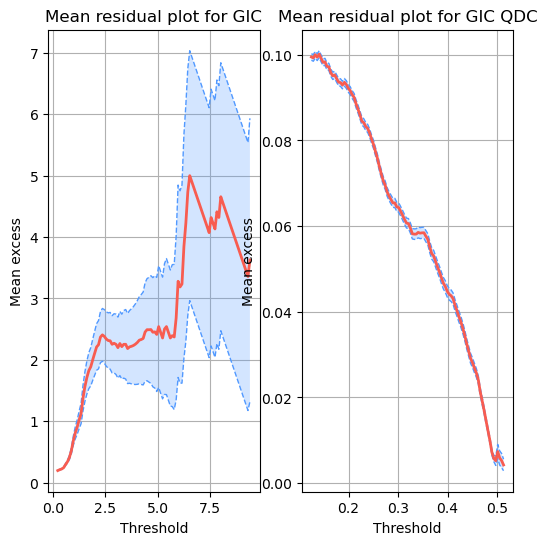

In [15]:
from pyextremes import plot_mean_residual_life

fig = plt.figure(figsize=(6,6))
gs = gridspec.GridSpec(1, 2, figure=fig)



ax1 = plt.subplot(gs[0, 0])
plot_mean_residual_life(df_qdc_resampled['GIC'][~np.isnan(df_qdc_resampled['GIC'])],ax=ax1)
ax1.set_title('Mean residual plot for GIC')
ax1.grid(True)

ax2 = plt.subplot(gs[0, 1])
plot_mean_residual_life(df_qdc_resampled['GIC_QDC'][~np.isnan(df_qdc_resampled['GIC_QDC'])],ax=ax2)
ax2.set_title('Mean residual plot for GIC QDC')
ax2.grid(True)

In [20]:
from pyextremes import get_extremes
from pyextremes.plotting import plot_extremes

threshold_GIC = 5. 
window_GIC = "6H"
extremes = get_extremes(df_qdc_resampled['GIC'],
                        "POT", 
                        threshold=threshold_GIC, 
                        r=window_GIC)

plot_extremes(
    ts=df_qdc_resampled['GIC'],
    extremes=extremes,
    extremes_method="POT",
    extremes_type="high",
    threshold=threshold_GIC,
    r=window_GIC,
)

(<Figure size 768x480 with 1 Axes>, <Axes: xlabel='DateTime', ylabel='GIC'>)

/Users/ryanmc/opt/anaconda3/envs/spwxr_network/lib/python3.9/site-packages/pyextremes/eva.py:131: RuntimeWarning: 1,324 Null values found in `data` - removing invalid entries
  warnings.warn(message=message, category=RuntimeWarning)


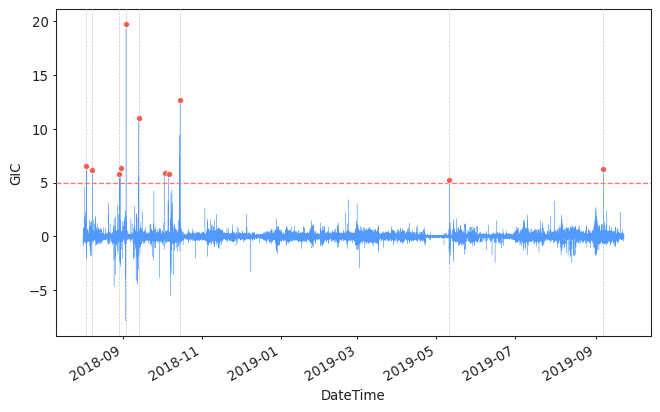

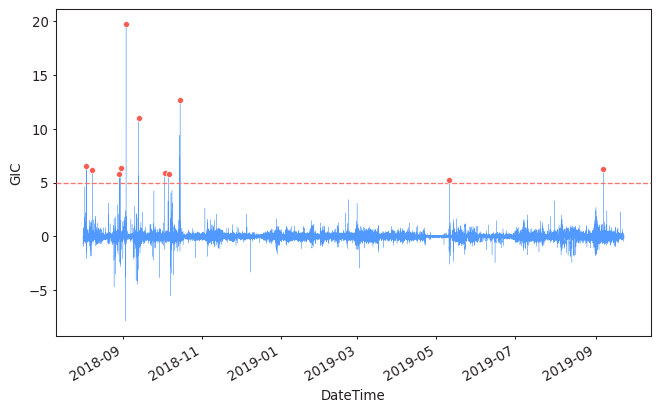

In [21]:

model = pyextremes.EVA(df_qdc_resampled['GIC'])
model.get_extremes("POT",threshold=threshold_GIC,r=window_GIC)
model.plot_extremes()
plt.show()

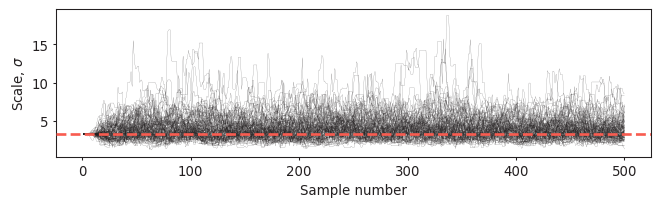

In [22]:
model.fit_model("Emcee", )
model.plot_trace()
plt.show()

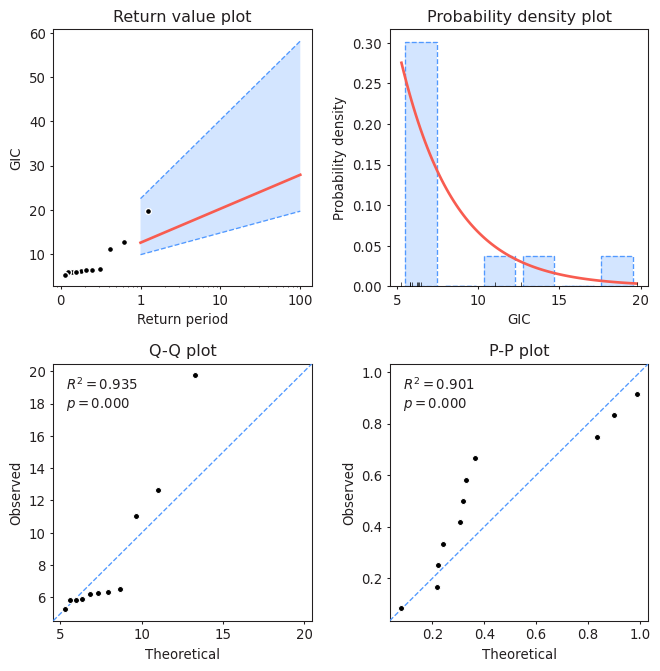

In [23]:
model.plot_diagnostic(return_period=np.logspace(0, 2, 100), alpha=0.95, burn_in=50)
plt.show()

In [24]:
summary = model.get_summary(
    return_period=[2, 5, 10, 25, 50, 100],
    alpha=0.95,
    burn_in=50,
)
summary

,return value,lower ci,upper ci
return period,,,
2.0,14.866088,11.318786,27.898094
5.0,17.924216,13.277380,34.995669
10.0,20.237600,14.758998,40.364776
25.0,23.295728,16.717592,47.462351
50.0,25.609112,18.199211,52.831459
100.0,27.922496,19.680829,58.200566
